In [93]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [94]:
def slice_image(path, crop_shape ,gap ):

    """
    arg1 : image 
    arg2 : crop_shape (row , col)
    crop할 사진의 이미지가 맞지 않으면 reshape을 진행합니다.
    gap : Image을 crop하고 얼만큼 
    """
    row = crop_shape[0]
    col = crop_shape[1]
    try:
        np_img=np.load(path)
    except IOError as ioe:
        break_flag=True
        print str(ioe)
        img=Image.open(path)
        np_img=np.asarray(img)
    
    shape= np.shape(np_img)
    img_row = shape[0]
    img_col = shape[1]
    print shape
    remainder_row=(img_row - row)%gap; 
    remainder_col=(img_col - col)%gap;    
    row_crop_iter = (img_row - row)/gap
    col_crop_iter = (img_col - col)/gap
    #print remainder_row
    #print row_crop_iter    
    count=0
    if len(shape)==2:
        ret_imgs=np.zeros([row_crop_iter*col_crop_iter ,crop_shape[0] , crop_shape[1]])
    if len(shape)==3:
        ret_imgs=np.zeros([row_crop_iter*col_crop_iter ,crop_shape[0] , crop_shape[1],shape[-1]])
    count=0
    print "총 잘라진 이미지 갯수는 :" ,row_crop_iter*col_crop_iter 
    for r in xrange(row_crop_iter):                        
        for c in xrange(col_crop_iter):
            start_row=r*gap
            end_row=start_row + row
            start_col = c*gap
            end_col=start_col+col
            ret_imgs[count]=np_img[start_row:end_row, start_col : end_col]
            count+=1
    return ret_imgs

Failed to interpret file './test.png' as a pickle
(778, 593, 3)
총 잘라진 이미지 갯수는 : 588


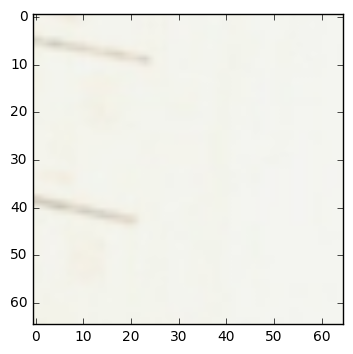

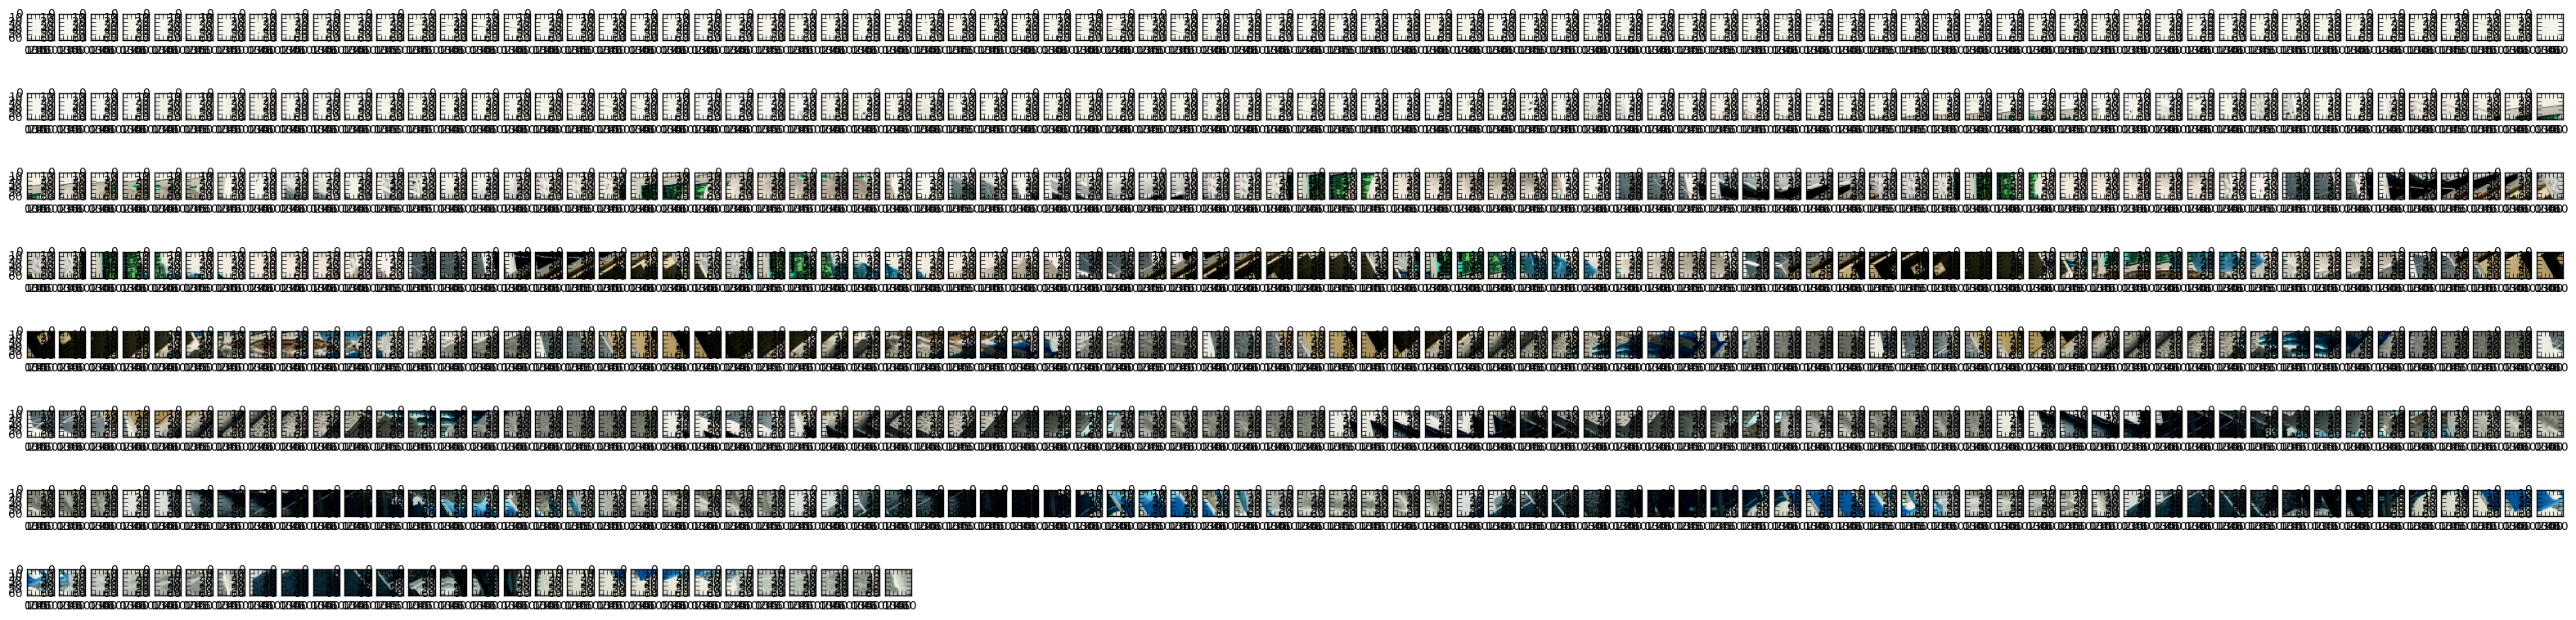

In [96]:
path = './test.png'
img=slice_image(path  , (65,65) ,25 )
plt.imshow(img[100])
fig = plt.figure(figsize=(40,100))
for i in range(588):
    dummy=fig.add_subplot(80,80,i+1)
    plt.imshow(img[i])
